In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
full_df = pd.read_excel("correlation_insurance.xlsx")
full_df.head()

,ID,Name,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,AB0001,Priya Patel,58,M,Health Insurance,68668.48,429.30,7412.89,Basic,648,Single,27-04-2014,No
1,AB0002,Rohan Desai,63,M,Life Insurance,68970.72,1757.39,10083.20,Standard,650,Single,15-05-2014,Yes
2,AB0003,Neha Agarwal,54,F,Life Insurance,68156.42,290.84,5205.74,Basic,645,Single,23-03-2015,Yes
3,AB0004,Amit Patel,48,M,Health Insurance,53127.39,1077.28,7966.00,Basic,548,Married,2018-03-05 00:00:00,Yes
4,AB0005,Pooja Agarwal,35,M,Health Insurance,60871.42,723.11,9007.93,Standard,598,Married,22-09-2020,No


In [ ]:
cols_to_drop = ['ID' , "Name"]
df = full_df.drop(cols_to_drop , axis = 1)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,M,Health Insurance,68668.48,429.30,7412.89,Basic,648,Single,27-04-2014,No
1,63,M,Life Insurance,68970.72,1757.39,10083.20,Standard,650,Single,15-05-2014,Yes
2,54,F,Life Insurance,68156.42,290.84,5205.74,Basic,645,Single,23-03-2015,Yes
3,48,M,Health Insurance,53127.39,1077.28,7966.00,Basic,548,Married,2018-03-05 00:00:00,Yes
4,35,M,Health Insurance,60871.42,723.11,9007.93,Standard,598,Married,22-09-2020,No


In [ ]:
gender_mapper = {"F" : 0 , "M" : 1}
df['Gender'] = df['Gender'].map(gender_mapper)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,Basic,648,Single,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,Standard,650,Single,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,Basic,645,Single,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,Basic,548,Married,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,Standard,598,Married,22-09-2020,No


In [ ]:
df['Plan Type'].value_counts()

,count
Plan Type,
Basic,44476
Standard,10317
Premium,207


In [ ]:
plan_mapper = {"Basic" : 1 , "Standard" : 2 , "Premium" : 3}
df['Plan Type'] = df["Plan Type"].map(plan_mapper)

In [ ]:
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,648,Single,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,650,Single,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,645,Single,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,548,Married,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,598,Married,22-09-2020,No


In [ ]:
married_mapper = {"Single" : 0 , "Married" : 1}
df['Marital Status'] = df['Marital Status'].map(married_mapper)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,648,0,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,650,0,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,645,0,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,548,1,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,598,1,22-09-2020,No


In [ ]:
def good_credit(credit):
    return int(credit > 640)
df['Credit Score'] = df['Credit Score'].apply(good_credit)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,22-09-2020,No


In [ ]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'] , dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        55000 non-null  int64         
 1   Gender                     55000 non-null  int64         
 2   Insurance Type             55000 non-null  object        
 3   Earnings ($)               55000 non-null  float64       
 4   Claim Amount ($)           55000 non-null  float64       
 5   Insurance Plan Amount ($)  55000 non-null  float64       
 6   Plan Type                  55000 non-null  int64         
 7   Credit Score               55000 non-null  int64         
 8   Marital Status             55000 non-null  int64         
 9   Policy Start Date          55000 non-null  datetime64[ns]
 10  Churn                      55000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage:

In [ ]:
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,2014-04-27,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,2014-05-15,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,2015-03-23,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,2020-09-22,No


In [ ]:
df['days_passed'] = (pd.Timestamp.today() - df['Policy Start Date']).dt.days
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn,days_passed
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,2014-04-27,No,3976
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,2014-05-15,Yes,3958
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,2015-03-23,Yes,3646
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05,Yes,2568
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,2020-09-22,No,1636


In [ ]:
future_loans_index = (df.loc[df['days_passed'] <= 0]).index

In [ ]:
#dropping the cols with future references
df.drop(future_loans_index , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54928 entries, 0 to 54999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        54928 non-null  int64         
 1   Gender                     54928 non-null  int64         
 2   Insurance Type             54928 non-null  object        
 3   Earnings ($)               54928 non-null  float64       
 4   Claim Amount ($)           54928 non-null  float64       
 5   Insurance Plan Amount ($)  54928 non-null  float64       
 6   Plan Type                  54928 non-null  int64         
 7   Credit Score               54928 non-null  int64         
 8   Marital Status             54928 non-null  int64         
 9   Policy Start Date          54928 non-null  datetime64[ns]
 10  Churn                      54928 non-null  object        
 11  days_passed                54928 non-null  int64         
dtypes: dateti

In [ ]:
churn_map = {"No" : 0 , "Yes" : 1}
df['Churn'] = df['Churn'].map(churn_map)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn,days_passed
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,2014-04-27,0,3976
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,2014-05-15,1,3958
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,2015-03-23,1,3646
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05,1,2568
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,2020-09-22,0,1636


In [ ]:
int_df = df.drop("Insurance Type" , axis = 1)
str_df = df['Insurance Type']

In [ ]:
encoded_str_df = pd.get_dummies(str_df).astype(int)
encoded_str_df

,Automobile Insurance,Health Insurance,Life Insurance
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
54995,1,0,0
54996,1,0,0
54997,1,0,0
54998,0,1,0


In [ ]:
final_df = pd.concat([int_df , encoded_str_df] , axis = 1)

In [ ]:
final_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,2014-04-27,0,3976,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,2014-05-15,1,3958,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,2015-03-23,1,3646,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,2018-03-05,1,2568,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,2020-09-22,0,1636,0,1,0


In [ ]:
final_df.drop(['Policy Start Date'] , axis = 1 , inplace = True)
final_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,0,3976,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,1,3958,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,1,3646,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,1,2568,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,0,1636,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54928 entries, 0 to 54999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        54928 non-null  int64         
 1   Gender                     54928 non-null  int64         
 2   Insurance Type             54928 non-null  object        
 3   Earnings ($)               54928 non-null  float64       
 4   Claim Amount ($)           54928 non-null  float64       
 5   Insurance Plan Amount ($)  54928 non-null  float64       
 6   Plan Type                  54928 non-null  int64         
 7   Credit Score               54928 non-null  int64         
 8   Marital Status             54928 non-null  int64         
 9   Policy Start Date          54928 non-null  datetime64[ns]
 10  Churn                      54928 non-null  int64         
 11  days_passed                54928 non-null  int64         
dtypes: dateti

In [ ]:
final_df.corr()['Churn']

,Churn
Age,-0.404731
Gender,0.004527
Earnings ($),-0.404355
Claim Amount ($),-0.101478
Insurance Plan Amount ($),-0.284799
Plan Type,-0.250990
Credit Score,-0.298784
Marital Status,-0.222136
Churn,1.000000
days_passed,-0.401997


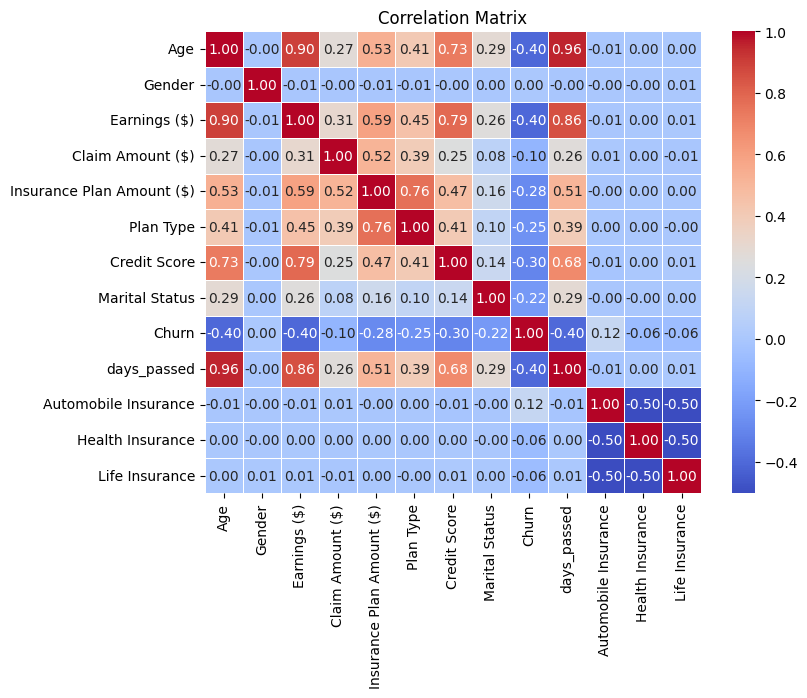

In [ ]:
corr_matrix = final_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
final_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,0,3976,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,1,3958,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,1,3646,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,1,2568,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,0,1636,0,1,0


<Axes: xlabel='Claim Amount ($)'>

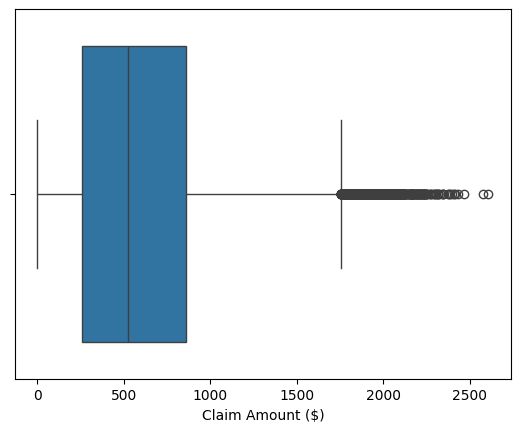

In [ ]:
sns.boxplot(data = final_df , x = "Claim Amount ($)")

In [ ]:
len(final_df)

54928

In [ ]:
amount_outliers = final_df.loc[final_df['Claim Amount ($)'] > 1800].index
final_df.drop(amount_outliers , inplace = True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54294 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54294 non-null  int64  
 1   Gender                     54294 non-null  int64  
 2   Earnings ($)               54294 non-null  float64
 3   Claim Amount ($)           54294 non-null  float64
 4   Insurance Plan Amount ($)  54294 non-null  float64
 5   Plan Type                  54294 non-null  int64  
 6   Credit Score               54294 non-null  int64  
 7   Marital Status             54294 non-null  int64  
 8   Churn                      54294 non-null  int64  
 9   days_passed                54294 non-null  int64  
 10  Automobile Insurance       54294 non-null  int64  
 11  Health Insurance           54294 non-null  int64  
 12  Life Insurance             54294 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.8 MB


<Axes: xlabel='Earnings ($)'>

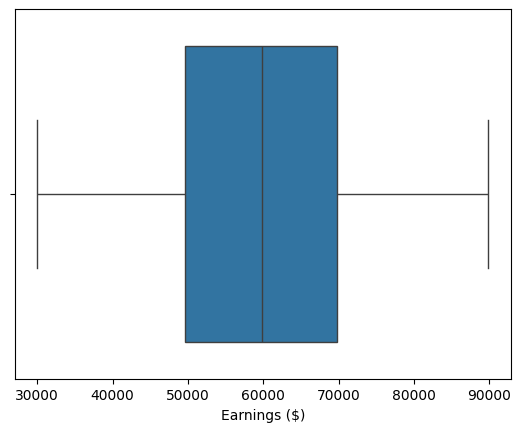

In [ ]:
sns.boxplot(data = final_df , x = "Earnings ($)")

<Axes: xlabel='Insurance Plan Amount ($)'>

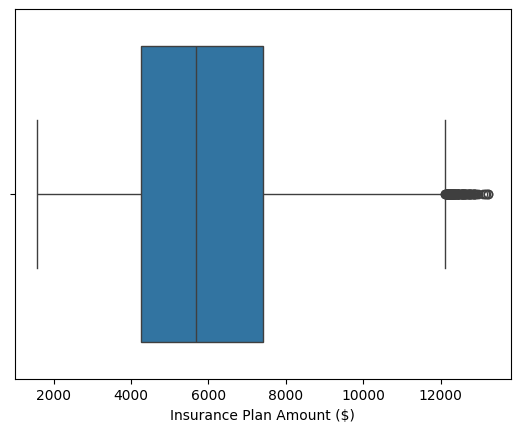

In [ ]:
sns.boxplot(data = final_df , x = "Insurance Plan Amount ($)")

In [ ]:
plan_outliers = final_df.loc[final_df['Insurance Plan Amount ($)'] > 12000].index
final_df.drop(plan_outliers , inplace = True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54157 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54157 non-null  int64  
 1   Gender                     54157 non-null  int64  
 2   Earnings ($)               54157 non-null  float64
 3   Claim Amount ($)           54157 non-null  float64
 4   Insurance Plan Amount ($)  54157 non-null  float64
 5   Plan Type                  54157 non-null  int64  
 6   Credit Score               54157 non-null  int64  
 7   Marital Status             54157 non-null  int64  
 8   Churn                      54157 non-null  int64  
 9   days_passed                54157 non-null  int64  
 10  Automobile Insurance       54157 non-null  int64  
 11  Health Insurance           54157 non-null  int64  
 12  Life Insurance             54157 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.8 MB


<Axes: xlabel='days_passed'>

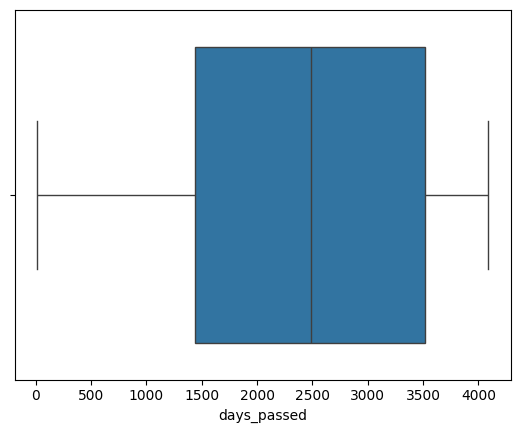

In [ ]:
sns.boxplot(data = final_df , x = "days_passed")

In [ ]:
df = final_df.copy()

In [ ]:
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,0,3976,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,1,3958,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,1,3646,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,1,2568,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,0,1636,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54157 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54157 non-null  int64  
 1   Gender                     54157 non-null  int64  
 2   Earnings ($)               54157 non-null  float64
 3   Claim Amount ($)           54157 non-null  float64
 4   Insurance Plan Amount ($)  54157 non-null  float64
 5   Plan Type                  54157 non-null  int64  
 6   Credit Score               54157 non-null  int64  
 7   Marital Status             54157 non-null  int64  
 8   Churn                      54157 non-null  int64  
 9   days_passed                54157 non-null  int64  
 10  Automobile Insurance       54157 non-null  int64  
 11  Health Insurance           54157 non-null  int64  
 12  Life Insurance             54157 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.8 MB


In [ ]:
y = df['Churn']
X = df.drop("Churn" , axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 101)

In [ ]:
scaling_cols = ['Earnings ($)' , 'Claim Amount ($)' , 'Insurance Plan Amount ($)' , 'days_passed']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_test[scaling_cols] = scaler.transform(X_test[scaling_cols])

In [ ]:
X_train.head(5)


,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance
53075,29,1,-1.545993,0.835667,-0.002272,1,0,0,-0.641424,1,0,0
39349,51,1,0.881164,1.959639,1.926974,2,1,0,0.298143,0,0,1
1642,70,1,1.236218,-1.020457,0.096722,1,1,1,1.185269,0,0,1
20948,21,1,-1.216922,-1.402958,-1.252068,1,0,0,-1.934093,0,1,0
32623,63,1,0.512196,1.367634,1.120070,2,0,0,1.209741,1,0,0


XGBoost gives best results


In [ ]:
from  sklearn.metrics import classification_report
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=42, use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("XGBoost Classifier Report:")
print(classification_report(y_test, preds))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      7063
           1       0.75      0.72      0.74      9185

    accuracy                           0.71     16248
   macro avg       0.70      0.70      0.70     16248
weighted avg       0.71      0.71      0.71     16248



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

def preprocess_user_input(user_data):
    processed_data = {}

    # Basic fields
    processed_data['Age'] = user_data['Age']

    # Gender encoding (assuming M=1, F=0 in the preprocessed data)
    processed_data['Gender'] = 1 if user_data['Gender'] == 'M' else 0

    # Earnings
    processed_data['Earnings ($)'] = user_data['Earnings ($)']

    # Claim Amount
    processed_data['Claim Amount ($)'] = user_data['Claim Amount ($)']

    # Insurance Plan Amount
    processed_data['Insurance Plan Amount ($)'] = user_data['Insurance Plan Amount ($)']

    # Plan Type (assuming 1=Basic, 2=Standard, 3=Premium)
    plan_type_map = {'Basic': 1, 'Standard': 2, 'Premium': 3}
    processed_data['Plan Type'] = plan_type_map[user_data['Plan Type']]

    # Credit Score - normalize to 0-1 range
    processed_data['Credit Score'] = user_data['Credit Score'] / 1000  # Assuming max score is around 1000

    # Marital Status (assuming 1=Married, 0=Single)
    processed_data['Marital Status'] = 1 if user_data['Marital Status'] == 'Married' else 0

    # Days passed - calculate days from Policy Start Date to today
    start_date = datetime.strptime(user_data['Policy Start Date'], '%d-%m-%Y')
    days_passed = (datetime.now() - start_date).days / 365  # Normalized by year
    processed_data['days_passed'] = days_passed

    # Insurance types (binary flags)
    insurance_type = user_data['Insurance Type']
    processed_data['Automobile Insurance'] = 1 if 'Automobile' in insurance_type else 0
    processed_data['Health Insurance'] = 1 if 'Health' in insurance_type else 0
    processed_data['Life Insurance'] = 1 if 'Life' in insurance_type else 0

    return pd.Series(processed_data)

In [ ]:
def get_similar_customers(customer_profiles, target_customer, n=5):
    combined = pd.concat([pd.DataFrame([target_customer]), customer_profiles])

    similarity_matrix = cosine_similarity(combined)
    similar_indices = similarity_matrix[0, 1:].argsort()[::-1][:n]

    return similar_indices

In [ ]:
def generate_recommendations(X, y, target_customer):
    similar_indices = get_similar_customers(X, target_customer)

    # Filter to non-churned similar customers
    non_churned_similar = [idx for idx in similar_indices if y.iloc[idx] == 0]

    if not non_churned_similar:
        return {"General": ["We don't have enough similar customers to provide personalized recommendations."]}

    similar_customers_data = X.iloc[non_churned_similar]
    recommendations = {}

    # 1. Plan Type comparison
    current_plan = target_customer['Plan Type']
    similar_plans = similar_customers_data['Plan Type'].value_counts().idxmax()
    plan_type_map = {1: 'Basic', 2: 'Standard', 3: 'Premium'}

    if current_plan != similar_plans:
        recommendations['Plan_Optimization'] = [
            f"Consider switching to our {plan_type_map[similar_plans]} plan which works well for customers similar to you",
            "Personalized coverage based on your usage patterns"
        ]

    # 2. Check which insurance types are common among similar non-churned customers
    auto_insurance_popular = similar_customers_data['Automobile Insurance'].mean() > 0.5
    health_insurance_popular = similar_customers_data['Health Insurance'].mean() > 0.5
    life_insurance_popular = similar_customers_data['Life Insurance'].mean() > 0.5

    insurance_recs = []
    if auto_insurance_popular and target_customer['Automobile Insurance'] == 0:
        insurance_recs.append("Add automobile insurance - popular among similar customers who stay with us")
    if health_insurance_popular and target_customer['Health Insurance'] == 0:
        insurance_recs.append("Include health insurance coverage - common among customers with your profile")
    if life_insurance_popular and target_customer['Life Insurance'] == 0:
        insurance_recs.append("Consider life insurance protection - beneficial for customers similar to you")

    if insurance_recs:
        recommendations['Insurance_Options'] = insurance_recs

    # 3. Analyze claim behaviors of similar customers
    avg_claim = similar_customers_data['Claim Amount ($)'].mean()
    if target_customer['Claim Amount ($)'] < avg_claim - 0.5:
        recommendations['Claim_Optimization'] = [
            "You may be under-utilizing your benefits compared to similar customers",
            "Schedule a coverage review to ensure you're getting the most from your plan"
        ]
    elif target_customer['Claim Amount ($)'] > avg_claim + 0.5:
        recommendations['Claim_Optimization'] = [
            "Your claim pattern differs from similar satisfied customers",
            "Consider our premium protection plan with higher claim limits"
        ]

    # 4. Credit score-based recommendations
    avg_credit = similar_customers_data['Credit Score'].mean()
    if target_customer['Credit Score'] < avg_credit - 0.1:
        recommendations['Credit_Improvement'] = [
            "Our credit improvement program can help enhance your insurance terms",
            "Customers with improved credit scores often receive better rates"
        ]

    # 5. Demographic insights
    # these are just plain rule based recommendations which is not affected by similar customers
    age = target_customer['Age']
    if age < 30:
        recommendations['Young_Customer'] = [
            "Short-term flexible coverage plans for young professionals",
            "Digital service with mobile app benefits"
        ]
    elif age > 55:
        recommendations['Senior_Customer'] = [
            "Fixed premium rates for long-term loyalty",
            "Priority human customer support"
        ]

    if target_customer['Marital Status'] == 1:
        recommendations['Family_Plans'] = [
            "Family insurance bundle with cost savings",
            "Spouse and children add-on policies"
        ]

    if target_customer['days_passed'] > 1.1 or target_customer['Claim Amount ($)'] < -0.8 or target_customer['Insurance Plan Amount ($)'] > 2.4 :
      recommendations['Good_Customer'] = [
            "3%-5% Discount on insurance plans."
        ]

    # If no specific recommendations were generated, provide a general one
    if not recommendations:
        recommendations['General'] = ["Based on similar customers, your current plan appears optimal."]

    return recommendations

In [ ]:
print(X_train['Claim Amount ($)'].min())
print(X_train['Insurance Plan Amount ($)'].min())
print(X_train['days_passed'].min())
print(X_train['Claim Amount ($)'].max())
print(X_train['Insurance Plan Amount ($)'].max())
print(X_train['days_passed'].max())

-1.4421847476566532
-2.044352686451261
-2.1027779309974304
3.0026861392347204
2.854436359228321
1.459709943892721


In [ ]:
# parse current services from customer data
def parse_current_services(customer_data):
    services = {}

    if isinstance(customer_data, pd.Series):
        # Insurance Types
        services['Insurance_Types'] = []
        if customer_data.get('Automobile Insurance', 0) == 1:
            services['Insurance_Types'].append('Automobile Insurance')
        if customer_data.get('Health Insurance', 0) == 1:
            services['Insurance_Types'].append('Health Insurance')
        if customer_data.get('Life Insurance', 0) == 1:
            services['Insurance_Types'].append('Life Insurance')

        # Plan Type
        plan_type_map = {1: 'Basic', 2: 'Standard', 3: 'Premium'}
        services['Plan Type'] = plan_type_map[customer_data['Plan Type']]

        # Credit Score
        services['Credit Score'] = 'Good' if customer_data['Credit Score'] > 0.65 else 'Poor'

        # Marital Status
        services['Marital Status'] = 'Married' if customer_data['Marital Status'] == 1 else 'Single'
    else:
        # For original format input
        services['Insurance_Types'] = [customer_data['Insurance Type']]
        services['Plan Type'] = customer_data['Plan Type']
        services['Credit Score'] = 'Good' if customer_data['Credit Score'] > 650 else 'Poor'
        services['Marital Status'] = customer_data['Marital Status']

    return services

In [ ]:
def interactive_customer_recommendations(X, y, model):
    print("Welcome to the Insurance Customer Churn Prevention System")
    print("Please enter customer information to receive personalized recommendations")

    while True:
        try:
            print("\n" + "="*50)
            print("Enter customer details (or type 'exit' to quit)")

            name_input = input("Name: ")
            if name_input.lower() == 'exit':
                print("Thank you for using our services")
                break

            # Collect user input based on the original format
            user_data = {
                'Name': name_input,
                'Age': int(input("Age: ")),
                'Gender': input("Gender (M/F): ").upper(),
                'Insurance Type': input("Insurance Type (Automobile/Health/Life): "),
                'Earnings ($)': float(input("Earnings ($): ")),
                'Claim Amount ($)': float(input("Claim Amount ($): ")),
                'Insurance Plan Amount ($)': float(input("Insurance Plan Amount ($): ")),
                'Plan Type': input("Plan Type (Basic/Standard/Premium): "),
                'Credit Score': int(input("Credit Score: ")),
                'Marital Status': input("Marital Status (Single/Married): "),
                'Policy Start Date': input("Policy Start Date (DD-MM-YYYY): ")
            }

            processed_user_data = preprocess_user_input(user_data)

            # Print customer analysis header
            print("\nCustomer Analysis for", user_data['Name'])
            print("-" * 50)

            # Ensure the processed data has the same columns as the training data
            missing_cols = set(X.columns) - set(processed_user_data.index)
            for col in missing_cols:
                processed_user_data[col] = 0

            # Make sure columns are in the same order
            processed_user_data = processed_user_data[X.columns]

            # Create input DataFrame for model prediction (XGBoost expects DataFrame)
            input_df = pd.DataFrame([processed_user_data])

            # Use the XGBoost model to predict churn probability
            churn_prob = model.predict_proba(input_df)[0][1]  # Get probability of positive class (churn)

            # Determine risk category
            if churn_prob < 0.3:
                risk_category = "Low Risk"
            elif churn_prob < 0.6:
                risk_category = "Medium Risk"
            else:
                risk_category = "High Risk"

            print(f"Customer Churn Risk: {risk_category} ({churn_prob:.1%} probability)")

            # Current services
            print("\nCurrent Services:")
            current = parse_current_services(user_data)
            print(f"Plan Type: {current['Plan Type']}")
            print(f"Insurance Types: {', '.join(current['Insurance_Types']) if current['Insurance_Types'] else 'None'}")
            print(f"Credit Score Status: {current['Credit Score']}")
            print(f"Marital Status: {current['Marital Status']}")

            # Generate recommendations based on similarity
            recommendations = generate_recommendations(X, y, processed_user_data)

            # Display recommendations
            print("\nPersonalized Recommendations (Based on Similar Customers):")
            if recommendations:
                for category, recs in recommendations.items():
                    if isinstance(recs, list):
                        for rec in recs:
                            print(f"- {rec}")
                    else:
                        print(f"- {recs}")
            else:
                print("No specific recommendations at this time.")

        except ValueError as e:
            print(f"Error: {e}")
            print("Please enter valid data in the correct format")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            print("Please try again")


if __name__ == "__main__":
    from xgboost import XGBClassifier
    model = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=42, use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train)


    # Interactive recommender
    interactive_customer_recommendations(X_train, y_train, model)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:58:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Welcome to the Insurance Customer Churn Prevention System
Please enter customer information to receive personalized recommendations

Enter customer details (or type 'exit' to quit)
Name: nikhil
Age: 35
Gender (M/F): M
Insurance Type (Automobile/Health/Life): Life
Earnings ($): 89963.50
Claim Amount ($): 345.21
Insurance Plan Amount ($): 10292
Plan Type (Basic/Standard/Premium): Standard
Credit Score: 843
Marital Status (Single/Married): Single
Policy Start Date (DD-MM-YYYY): 22-09-2020

Customer Analysis for nikhil
--------------------------------------------------
Customer Churn Risk: Medium Risk (59.8% probability)

Current Services:
Plan Type: Standard
Insurance Types: Life
Credit Score Status: Good
Marital Status: Single

Personalized Recommendations (Based on Similar Customers):
- Include health insurance coverage - common among customers with your profile
- Your claim pattern differs from similar satisfied customers
- Consider our premium protection plan with higher claim limits


In [ ]:
# example values to enter

# 'ID': 'AB0005', 'Name': 'Pooja Agarwal', 'Age': 35, 'Gender': 'M',
#             'Insurance Type': 'Health Insurance', 'Earnings ($)': 60871.42,
#             'Claim Amount ($)': 723.11, 'Insurance Plan Amount ($)': 9007.93,
#             'Plan Type': 'Standard', 'Credit Score': 598, 'Marital Status': 'Married',
#             'Policy Start Date': '22-09-2020', 'Churn': 'No'

# 'ID': 'AB0001', 'Name': 'Shreya Patel', 'Age': 58, 'Gender': 'M',
#             'Insurance Type': 'Health Insurance', 'Earnings ($)': 68668.48,
#             'Claim Amount ($)': 429.30, 'Insurance Plan Amount ($)': 7412.89,
#             'Plan Type': 'Basic', 'Credit Score': 648, 'Marital Status': 'Single',
#             'Policy Start Date': '27-04-2014', 'Churn': 'No'

In [ ]:
import pickle
with open("ml_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
